In [1]:
cd '/Volumes/OS X EL CAPITAN/Dropbox/Pints/Pints1/pints'

/Volumes/OS X EL CAPITAN/Dropbox/Pints/Pints1/pints


In [2]:
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Logistic model

In [10]:
# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 10
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, noise*0.1],
    [0.02, 600, noise*100]
)

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Choose starting points for 3 mcmc chains
xs = [
    real_parameters * 1.1,
    real_parameters * 0.9,
    real_parameters * 1.15,
]

# Create mcmc routine
mcmc = pints.MCMCSampling(log_posterior, 3, xs, method=pints.AdaptiveCovarianceMCMC)

# Add stopping criterion
mcmc.set_max_iterations(4000)

# Start adapting after 1000 iterations
mcmc.set_adaptation_free_iterations(1000)

# Disable logging mode
mcmc.set_log_to_screen(False)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Show traces and histograms
pints.plot.trace(chains)

# Discard warm up
chains = chains[:, 2000:, :]

# Check convergence using rhat criterion
print('R-hat:')
print(pints.rhat_all_params(chains))

# Look at distribution in chain 0
pints.plot.pairwise(chains[0], kde=True)

# Show graphs
plt.show()

ValueError: Given log_prior and log_likelihood must have same dimension.

In [9]:
result = pints.McmcResultObject(chains, 100)
result.print_summary()

param    mean    std.    2.5%    25%     50%     75%     97.5%    rhat    ess      ess per sec.
-------  ------  ------  ------  ------  ------  ------  -------  ------  -------  --------------
param 1  0.02    0.00    0.01    0.01    0.02    0.02    0.02     1.00    3498.18  34.98
param 2  500.29  0.49    499.36  499.95  500.30  500.63  501.25   1.00    3185.35  31.85
param 3  10.24   0.23    9.80    10.08   10.24   10.39   10.69    1.00    3351.06  33.51


# Constant model

Running...
Done!
R-hat:
[1.0002994757918202, 1.0002924356949159, 1.0000245706164024, 1.0001302881530316]


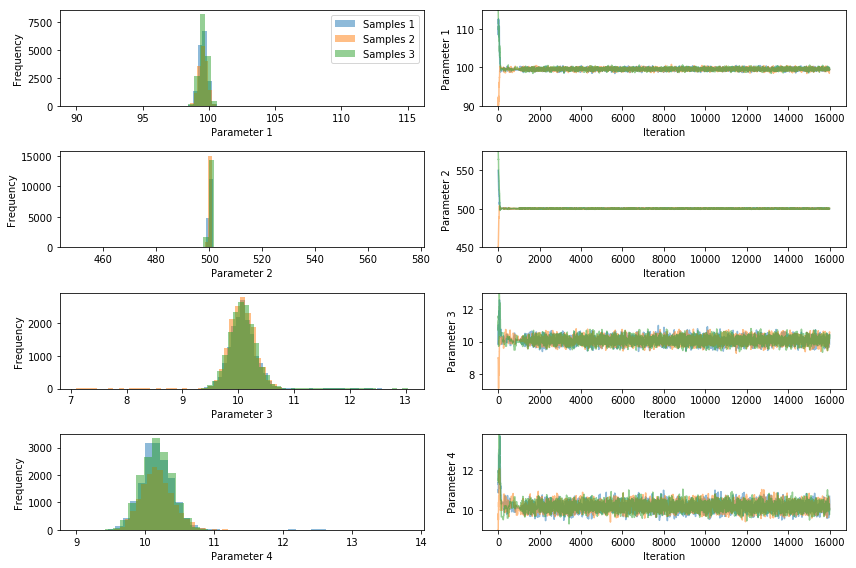

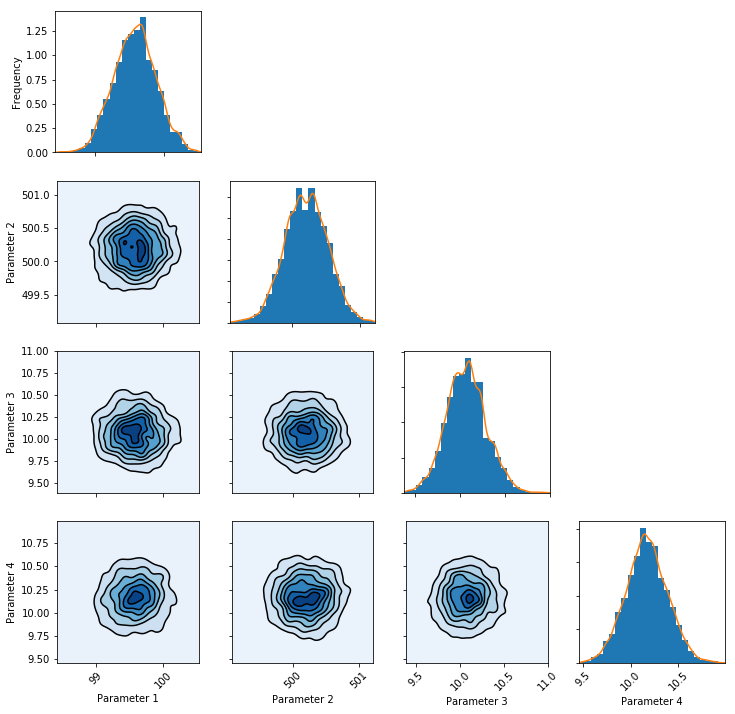

In [13]:
# Load a forward model
model = toy.ConstantModel()

# Create some toy data
real_parameters = [100, 500]
times = np.linspace(0, 1000, 1000)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 10
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise, noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.MultiOutputProblem(model, times, values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0, 400, noise*0.1, noise*0.1],
    [200, 600, noise*100, noise*100]
)

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Choose starting points for 3 mcmc chains
xs = [
    real_parameters * 1.1,
    real_parameters * 0.9,
    real_parameters * 1.15,
]

# Create mcmc routine
mcmc = pints.MCMCSampling(log_posterior, 3, xs, method=pints.AdaptiveCovarianceMCMC)

# Add stopping criterion
mcmc.set_max_iterations(16000)

# Start adapting after 1000 iterations
mcmc.set_adaptation_free_iterations(1000)

# Disable logging mode
mcmc.set_log_to_screen(False)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Show traces and histograms
pints.plot.trace(chains)

# Discard warm up
chains = chains[:, 2000:, :]

# Check convergence using rhat criterion
print('R-hat:')
print(pints.rhat_all_params(chains))

# Look at distribution in chain 0
pints.plot.pairwise(chains[0], kde=True)

# Show graphs
plt.show()

In [3]:
log_pdf = toy.HighDimensionalNormalLogPDF(dimension=3,correlation=0.5)

# Create an adaptive covariance MCMC routine
x0 = np.random.uniform([2, 2, 2], [8, 8, 8],size=(4, 3))
mcmc = pints.MCMCSampling(log_pdf, 4, x0, method=pints.AdaptiveCovarianceMCMC)

# Set maximum number of iterations
mcmc.set_max_iterations(4000)

# Disable logging
mcmc.set_log_to_screen(False)

# Number of chains
num_chains = 4

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Look at distribution in chain 0
#pints.plot.pairwise(chains[0], kde=True)

# Show graphs
#plt.show()


# Discard warm up
chains = chains[:, 2000:, :]

Running...
Done!


In [33]:
aObject = pints._mcmc._result.McmcResultObject(chains, 10)
new = aObject.extract_all()
mean_est = np.mean(new,axis=0)
sd_est = np.std(new,axis=0)

In [37]:
np.linalg.norm(sd_est)
np.linalg.norm(sd_est-np.sqrt([1, 2, 3]))


0.089153745312353858

In [5]:
import scipy.integrate
import scipy.special

In [8]:
scipy.special.gammaincc(1,2)

0.1353352832366127

In [48]:
def logistic(r, k, N0, t):
    return k /(1 + ((k - N0)/N0) * np.exp(-r *t))

def limitedLikelihoodLogistic(r, k, N0, y, t, sigmaRange):
    SSE = 0
    n = len(y)
    for j in range(0, n):
        SSE +=  (y[j] - logistic(r, k, N0, t[j]))**2
    return 0.5 * SSE**(0.5 - n/4) * scipy.special.gammaincc(1/4 * (n - 2), SSE/(sigmaRange**2))

In [49]:
limitedLikelihoodLogistic(0.5, 50, 1, [10, 50, 70], [5, 18, 20], 10)

0.00016318235033152163

In [41]:
scipy.integrate.dblquad(logistic(0.5, 50, 1, 20)

49.889017064338617

In [55]:
def lll_simple(r, k):
    return limitedLikelihoodLogistic(r, k, 1, [10, 50, 70], [5, 18, 20], 10)

In [63]:
scipy.integrate.nquad(lll_simple, [[0, 10],[0, 1000]])

(0.020704252360477075, 1.48999521864715e-08)

In [54]:
lll_simple(0.5, 10)

In [3]:
log_pdf = toy.HighDimensionalNormalLogPDF(dimension=3,correlation=0.9)

# Create an adaptive covariance MCMC routine
x0 = np.random.uniform([2, 2, 2], [8, 8, 8],size=(4, 3))
mcmc = pints.MCMCSampling(log_pdf, 4, x0, method=pints.AdaptiveCovarianceMCMC)

In [4]:
type(mcmc)

pints._mcmc.MCMCSampling

In [ ]:
log_pdf = toy.HighDimensionalNormalLogPDF(dimension=3,correlation=0.5)

# Create an adaptive covariance MCMC routine
x0 = np.random.uniform([2, 2, 2], [8, 8, 8],size=(4, 3))
mcmc = pints.MCMCSampling(log_pdf, 4, x0, method=pints.AdaptiveCovarianceMCMC)

# Set maximum number of iterations
mcmc.set_max_iterations(4000)

# Disable logging
mcmc.set_log_to_screen(False)

# Number of chains
num_chains = 4

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')